___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

# Read Data

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


* mean, std ve %50 değerleri göz önüne alındığında fetaure ların dağılımları normal dağılıma yakın.
* km dağılımı ise outliers ları olan skewness dağılım sergiliyor
* outliers ları hemen çıkarmak uygun olmaz. gerçek verilerde hemen feda edilmez. modele alıp duruma göre outlierslar atılabilir

In [6]:
df.columns                        # features adlarında boşluk varmı yokmu kontrol etmek faydalı olur

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

### Dataya Dönmek Gerekirse

In [7]:
df2 = df.copy()            # df in kopyasını bulundurmak ihtiyaç durumunda kullanmak için faydalı.
                           # df kopyasını sütun isimlerinde değişikli ihtiyacı varsa onları yaptıktan sonra almak daha iyi olur

## Feature Engineering

In [8]:
df.select_dtypes(include ="object").head()               # object olan columns ları görmek istiyoruz. 
                                                         # ayrıca object lerde dummies ihtiyacı varmı görebiliriz 

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control?

In [9]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [10]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

her bir veri için min 15/20 bilgi olması gerekir. bu nedenle make_model Audi A2 olanları drop etme kararı alıyruz

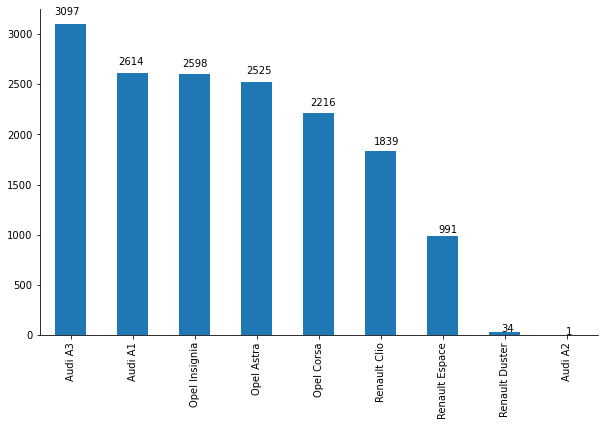

In [11]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [12]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [13]:
df.drop(index=[2614], inplace =True)

In [14]:
df.shape

(15914, 23)

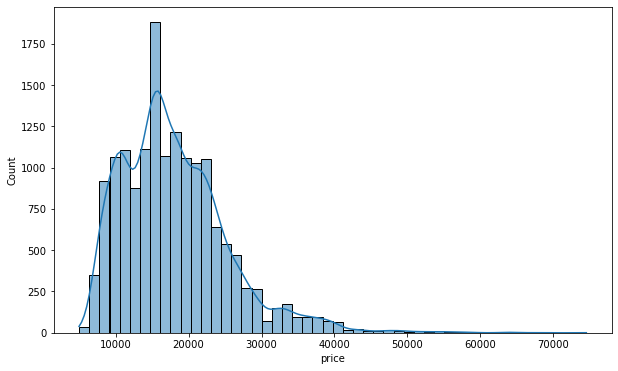

In [15]:
sns.histplot(df.price, bins=50, kde=True);

* target variable ın dağılımını görmek istiyoruz. right skewness durumu görülüyor. kuyruğun sağa doğru uzamasından üst segment pahalı araçların olduğu yorumunu yapabiliriz.
* kuruk dışında kalan kısım normal dağılıma yakın bir dağılım sergilemiş.

### skewness

In [16]:
skew(df.price)

1.236330745564795

In [17]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


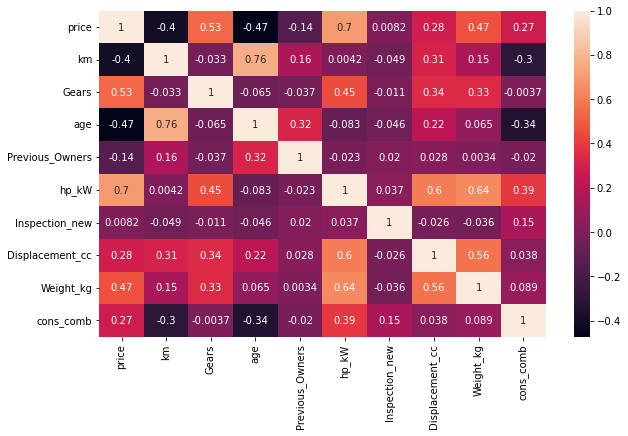

In [18]:
sns.heatmap(df_numeric.corr(), annot =True);            # sayısal sütunların korelasyon durumunu görüyoruz

## multicollinearity control

sütunlar arasında yüksek korelasyon durumu varmı bunu kontrol ediyoruz.

In [19]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [20]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

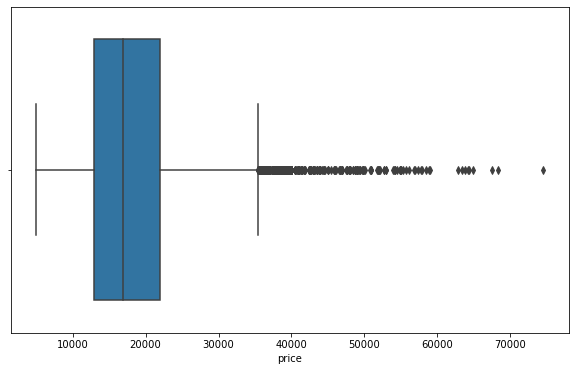

In [21]:
sns.boxplot(df.price);

* 35000 price üzeri boxplot gösteriminde outliers olarak görülüyor. Outliers olarak değerlendirip atmak herzaman doğru olmaz. 

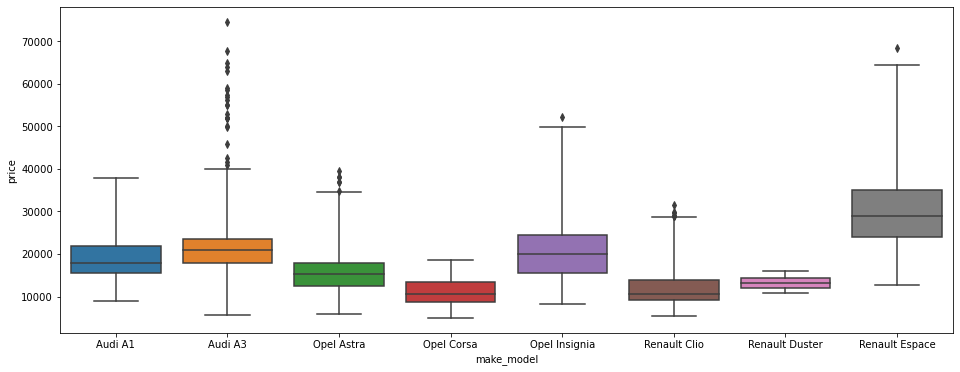

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)              # wish default 1.5 IQR
plt.show()

## Get dummies 

In [23]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


yukarıda object columns ları incelediğimizde 4 columns un farklı yapısı ortaya çıkıyor. öncelikle bu columns lara get_dummies yapıyoruz. ardından ikinci get_dummies olarak diğer object columns lara yapıyoruz

In [24]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [25]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True) 

# get_dummies sonrası orjinal fetaures drop ediliyor

In [26]:
df = pd.get_dummies(df, drop_first =True)       # drop_first = True ile det_dummies yapılan column un bir tanesi silinir 

In [27]:
df.head()                                       # get_dummies sonrası df

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [28]:
df.shape                             # get_dummies sonrası column sayımız 133 oldu

(15914, 133)

In [29]:
df.isnull().any().any()              # df te null değer varmı sorguluyoruz

False

In [30]:
corr_by_price = df.corr()["price"].sort_values()[:-1]       # price ın diğer columns larla korelasyon durumu
corr_by_price

age                                        -0.473478
Gearing_Type_Manual                        -0.431798
km                                         -0.399301
make_model_Opel Corsa                      -0.379363
Type_Used                                  -0.366300
make_model_Renault Clio                    -0.297910
Drive_chain_front                          -0.155738
Previous_Owners                            -0.144625
make_model_Opel Astra                      -0.128429
em_CD player                               -0.092823
em_On-board computer                       -0.077462
ss_Central door lock with remote control   -0.070339
ss_Fog lights                              -0.053086
Paint_Type_Perl effect                     -0.049887
ss_Isofix                                  -0.045762
body_type_Sedans                           -0.044251
ss_Central door lock                       -0.043515
ss_Power steering                          -0.041182
Paint_Type_Uni/basic                       -0.

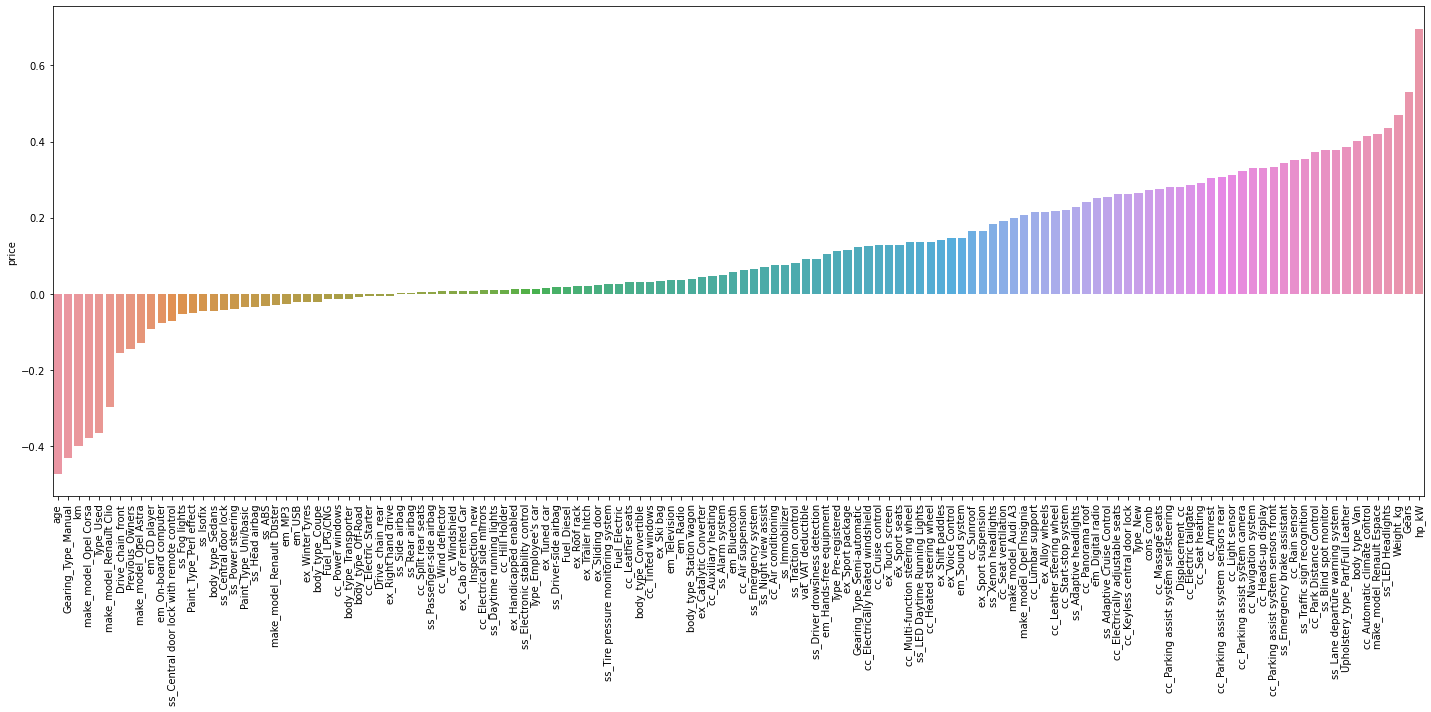

In [31]:
plt.figure(figsize = (20,10))              # price ın diğer columns larla korelsyon durumu görselleştirilmesi
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

### random_state=101

### test size = 0.2

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop("price", axis = 1)    
y = df["price"]     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 101)

print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\ny Test features shape : {}"
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (12731, 132)
y Train features shape: (12731,)
X Test features shape : (3183, 132)
y Test features shape : (3183,)


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)   # Tahmin edilen y_pred ve y_train_pred değerleri ile gerçek değerler 
                                            # olan y_train ve y_test değerleri üzerinden r2, mae, mse ve rmse gibi 
                                            # score değerlerini bir df olarak döndüren bir fonksiyon tanımlıyoruz
    
    scores = {"train": {"R2"   :  "%.3f" % r2_score(y_train, y_train_pred),
                        "mae"  :  "%.3f" % mean_absolute_error(y_train, y_train_pred),
                        "mse"  :  "%.3f" % mean_squared_error(y_train, y_train_pred),
                        "rmse" :  "%.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
              "test": {"R2"   :  "%.3f" % r2_score(y_test, y_pred),
                       "mae"  :  "%.3f" % mean_absolute_error(y_test, y_pred),
                       "mse"  :  "%.3f" % mean_squared_error(y_test, y_pred),
                       "rmse" :  "%.3f" % np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()                        # lineer Regresyon modelini import ettik ve lm e atatık 
lm.fit(X_train, y_train)                       # modeli fit ettik. X_train ve y_train değerlerine göre model oluşturduk. eğitim

LinearRegression()

In [35]:
y_pred = lm.predict(X_test)                # fit edilen model ile X_test datasından tahmin edilen y (y_pred) değerleri bulundu
y_train_pred = lm.predict(X_train)         # X_train datasından tahmin edilen (y_train_pred) değerleri bulundu

# print(y_pred)
# print(y_train_pred)

In [36]:
# pd.options.display.float_format = '{:.3f}'.format   # virgülden sonra 3 basamak yuvarlar

In [37]:
train_val(lm, X_train, y_train, X_test, y_test) 

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


* target tahmini yaparken, mae ortalama 1705 lık hata yapabileceğimizi gösteriyor, rmse ise ortalama 2405 lık hata yapabileceğimizi belirtiyor. aralarında bu kadar fark olması verimizde outliers lar olabileceğini, bazı değerlerin modelin yanlış tahminde bulunmasına neden olduğunu düşünebiliriz. rmse nin yüksek çıkması bunu gösterir. cezalandırma etkisi fazladır. mae ve rmse birbiriyle uyumlu çıkmış olsa sorun olmaz r2 de iyi çıktığı için model başarılı diyebiliriz. ama aradaki fark nedeniyle bir sorun olduğunu düşünüyoruz ve onu anlamaya çalışıyoruz. 
* artan fetaures sayısıda complex liği arttırdığı için buna neden olabilir kontrol etmek için adj_r2 kontrol ediyoruz.

### Adjusted R2 Score

get_dummies sonrası fetaure sayımız artarak 133 olmuştu. row/observation sayımız artan fetaure sayımız için yeterlimi bunu anlamamızı sağlar

In [38]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]                        # number of observations gözlem
    p = df.shape[1]-1                      # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)      # hazır formül (adj_r2)
    return adj_r2

#   return {"adj_r2" : "%.3f" % adj_r2}    bunu kullanırsak noktadan sonra 3 basamak olarak yuvarlıyor

In [39]:
adj_r2(y_test, y_pred, df)                # r2 ile karşılaştırıldığında satır ve sütun sayısının uyumlu olduğu görülüyor

0.8895777429178962

## Cross Validate

CV = 10 ile 10 katlı validasyon yapıyoruz. score değerlerini 10 defa hesaplıyoruz, sonrasında ortalamalarını alarak score larımızı buluyoruz

In [40]:
# CV öncesi model sıfırlanır. model = LinearRegression() ile bu yapılıyor

from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression()

scores = cross_validate(model, X_train, y_train, scoring = ['r2', 
                                                            'neg_mean_absolute_error',
                                                            'neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv = 10)

pd.DataFrame(scores , index = range(1,11)).round(3)         # round(3) ile noktadan sonra 3 basamağa yuvarlıyor. 
                                                            # 4 yazınca etkisiz oluyor

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.077,0.004,0.888,-1671.830,-5420159.539,-2328.124
2,0.061,0.000,0.884,-1776.103,-6233395.322,-2496.677
3,0.079,0.000,0.889,-1740.004,-6098855.314,-2469.586
4,0.079,0.000,0.883,-1737.442,-6939644.084,-2634.320
5,0.068,0.000,0.890,-1737.987,-6466406.057,-2542.913
6,0.063,0.016,0.886,-1724.773,-6485380.214,-2546.641
7,0.063,0.016,0.886,-1733.664,-5886688.695,-2426.250
8,0.063,0.007,0.901,-1680.942,-5563552.893,-2358.718
9,0.056,0.016,0.874,-1755.679,-7249552.942,-2692.499
10,0.063,0.000,0.881,-1740.491,-6141612.021,-2478.228


In [41]:
scores = pd.DataFrame(scores , index = range(1,11))
scores.iloc[:, 2:].mean().round(3)

test_r2                                   0.886
test_neg_mean_absolute_error          -1729.891
test_neg_mean_squared_error        -6248524.708
test_neg_root_mean_squared_error      -2497.396
dtype: float64

In [42]:
train_val(lm, X_train, y_train, X_test, y_test)    # CV sonrası score lar ile karşılaştırıyoruz. score larımız uyumlu

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [43]:
# aldığımız score larda hata payımızın kaç olduğunu rmse/price_mean ile buluyoruz.

R2_score = r2_score(y_test, y_pred)
print({"R2_score          " : R2_score})

mae = mean_absolute_error(y_test, y_pred)
print({"mae               " : mae})

mse = mean_squared_error(y_test, y_pred)
print({"mse               " : mse})

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print({"rmse              " : rmse})

price_mean = df["price"].mean()                        # price sütununda yer alan price değerlerinin ortalamasini aldik
print({"price_mean        " : price_mean})

print({"mae / price_mean  " : mae / price_mean})

print({"rmse / price_mean " : rmse / price_mean})      # %13 hata ile tahminde buluyoruz. sonuç aşağıda 

{'R2_score          ': 0.8904937070940312}
{'mae               ': 1705.216669309116}
{'mse               ': 5785150.71109266}
{'rmse              ': 2405.2340241840625}
{'price_mean        ': 18023.741171295715}
{'mae / price_mean  ': 0.09460947386577064}
{'rmse / price_mean ': 0.13344810055387363}


In [44]:
2405 / df.price.mean()         # bulduğumuz rmse değerini df.price ın mean değerine bölersek direk sonucu buluruz. 
                            # üst kod bloğunda score lar ayrı ayrı bulunurak bu değer bulundu.

0.13343511633590033

## Prediction Error

In [45]:
residuals =y_test- y_pred      
residuals                                

15079   -2290.627831
13097   -1817.959980
11349   -1291.947119
2668     -388.629659
12668    1372.982728
            ...     
10336   -1185.913445
12699   -2240.866662
7491       89.323898
4945     -512.671512
7999    -3118.107449
Name: price, Length: 3183, dtype: float64

In [46]:
from yellowbrick.regressor import PredictionError

* residuals ların durumunu yellowbrick kütüphanesi ile direk görselleştirebiliriz.

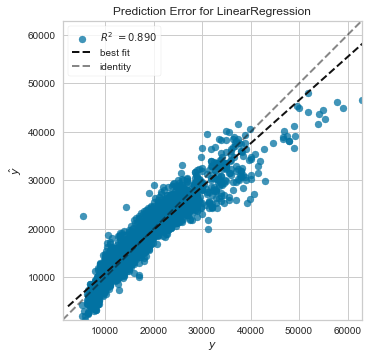

In [47]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # fit the training data to the visualizer
visualizer.score(X_test, y_test)  # evaluate the model on the test data
visualizer.show();

* gri kesikli çizgi tahminlerin en iyi olduğu doğru, siyah kesik çizgi ise best line mız. aralarında açıklık ne kadar az olursa okadar iyi.
* 35/40 bine kadar olan price değerlerinin tahmininde modelimiz başarılı, daha büyük price değerleri için hata değerlerimiz büyüyor ve best fit line ı aşağı yönlendiriyor.

## Residual Plot

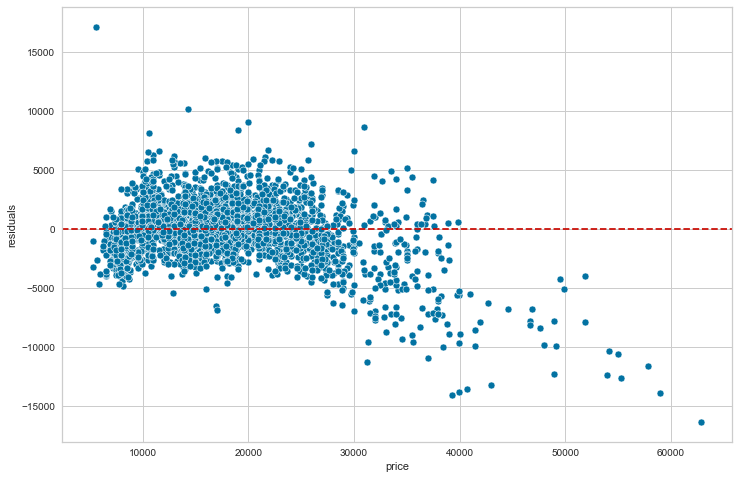

In [48]:
plt.figure(figsize= (12,8))
residuals = y_test - y_pred

sns.scatterplot(x =  y_test, y = -residuals)              #  -residuals
plt.axhline(y= 0, color = "r", linestyle = "--")        # horizantal line
plt.ylabel("residuals")
plt.show()

residulas ları plotladığımızda 35/40 bin price değerine kadar residualslar dağılımı iyi. sonrasında hata değerleri büyüyor.
60/70 binlik araçlarda 15/20 binlik hatalar olabiliyor

In [49]:
from yellowbrick.regressor import ResidualsPlot

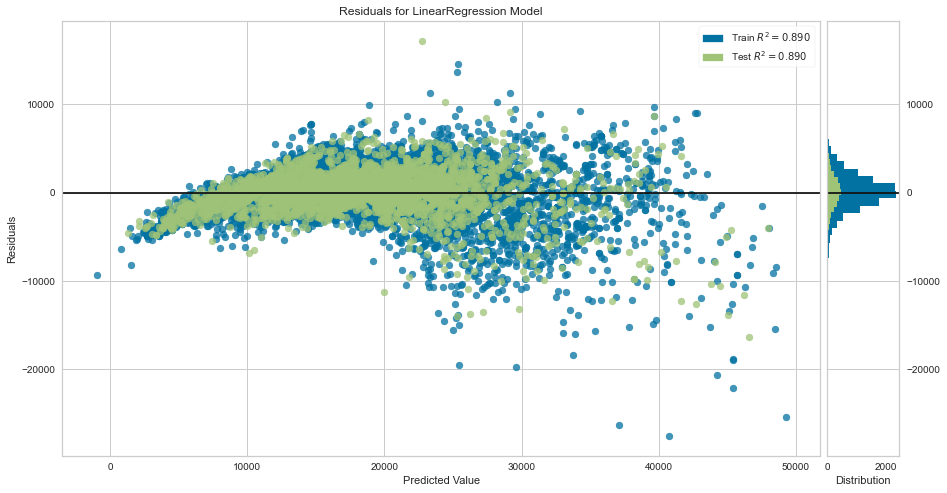

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
# residualsları plotluyoruz ve yanda dağılımlarını görüyoruz.

# visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
plt.figure(figsize= (15,8))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Dropping observations from the dataset that worsen my predictions

### test size = 0.2

multicollinearity control başlığı altında featureslar arasında yüksek korelasyon olup olmadığı kontrol edilmiş ve yüksek korelasyon durumu olmadığı görülmüştür.

sonrasında boxplot ile yapılan kontrollerde price target variable için outliers durumu görmüştük.

Outliers sınırlarımızı belirliyoruz aşağıda

In [51]:
df.price.describe()

count    15914.000000
mean     18023.741171
std       7381.470484
min       4950.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [52]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')

Q1 = price              12850.0
km                  1920.5
Gears                  5.0
age                    0.0
Previous_Owners        1.0
hp_kW                 66.0
Inspection_new         0.0
Displacement_cc     1229.0
Weight_kg           1165.0
cons_comb              4.1
Name: 0.25, dtype: float64
Q3 = price              21900.0
km                 46900.0
Gears                  6.0
age                    2.0
Previous_Owners        1.0
hp_kW                103.0
Inspection_new         0.0
Displacement_cc     1598.0
Weight_kg           1472.0
cons_comb              5.4
Name: 0.75, dtype: float64


In [53]:
IQR = Q3 - Q1
IQR['price']

9050.0

In [54]:
alt_sinir = Q1 - 1.5*IQR['price']
ust_sinir = Q3 + 1.5*IQR['price']
print(f'alt_sinir = {alt_sinir}')   #bu sinirların altında kalanlar outlier
print(f'ust_sinir = {ust_sinir}')   #bu sinirların üstünde kalanlar outlier


alt_sinir = price               -725.0
km                -11654.5
Gears             -13570.0
age               -13575.0
Previous_Owners   -13574.0
hp_kW             -13509.0
Inspection_new    -13575.0
Displacement_cc   -12346.0
Weight_kg         -12410.0
cons_comb         -13570.9
Name: 0.25, dtype: float64
ust_sinir = price              35475.0
km                 60475.0
Gears              13581.0
age                13577.0
Previous_Owners    13576.0
hp_kW              13678.0
Inspection_new     13575.0
Displacement_cc    15173.0
Weight_kg          15047.0
cons_comb          13580.4
Name: 0.75, dtype: float64


In [55]:
low_price=df2["price"].quantile(0.25)
high_price=df2["price"].quantile(0.75)
iqr_price=high_price-low_price
lower_lim_price=low_price-(1.5*iqr_price)
high_lim_price=high_price+(1.5*iqr_price)

print(low_price,"\n",high_price,"\n",lower_lim_price,"\n",high_lim_price,"\n",iqr_price)

12850.0 
 21900.0 
 -725.0 
 35475.0 
 9050.0


df üzerinde get_dummies yaptığımız için column isimleri ve değerleri değişmişti. ilk başta kopyaladaığımız df2 üzerinden outliersların durumunu inceleyelim.

In [56]:
df2              # verimizin ilk hali olan df2 yi görüyoruz

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.362609,New,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3
15911,Renault Espace,Van,39885,VAT deductible,9900.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.0,1.0,165.0,0,Metallic,Cloth,Automatic,1798.0,1708.0,front,7.4
15912,Renault Espace,Van,39875,VAT deductible,15.000000,Pre-registered,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.0,1.0,146.0,1,Metallic,Part/Full Leather,Automatic,1997.0,1734.0,front,5.3
15913,Renault Espace,Van,39700,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3


In [57]:
len(df2[df2.price>35475])             # 479 observation ın price değeri 35475 üzerinde outliers durumda olduğunu gözlemliyoruz


479

In [58]:
df2[df2.price>35475].groupby("make_model").count().iloc[:,0]

# price değeri 35475 üzerinde olanları modellerine göre gruplandıırp saydırdık 
# aşağıda tüm veri içerisindeki sayılarla karşılaştırıyoruz

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     207
Renault Espace    229
Name: body_type, dtype: int64

In [59]:
df2.make_model.value_counts()      # yukardaki sayılardaki araçlara ait verileri atmak sorun olmaz diye düşünüyoruz


Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [60]:
df3 = df[~(df.price>35475)]    # daha önce df üzerinden score değerleri hesaplamıştık. df ten price değeri 35475 altında olanlrı
df3                            # df3 olarak tanımlayarak, outliers lardan temizlenen data üzerinde score lara bakıyoruz

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [61]:
X = df3.drop(columns = "price")
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [62]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

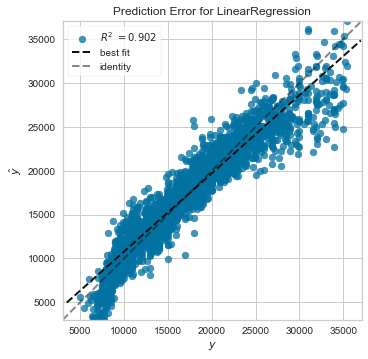

In [63]:
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

* outlierslar atıldıktan sonra oluşturduğumuz modelde, r2 0.902 oldu, best fit line ile identity line arasındaki açıklık azaldı

In [64]:
train_val(lm2, X_train, y_train, X_test, y_test)    # lm2 nin score larını görüyoruz. 

,train,test
R2,0.900,0.902
mae,1416.886,1408.870
mse,3809301.728,3708830.812
rmse,1951.743,1925.832


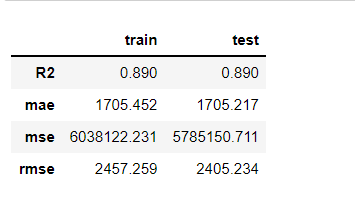

outlierların olduğu df imizin CV sonrası score ları ile df3 score larını  karşılatırdığımızda iyileşme görüyoruz. r2, mae ve rmse hepsinde olumlu iyileşme var. rmse de 500 $ lık iyileşme var

In [65]:
# tahmin sonrası score ları görmek için kod bloğu bulunsun lazım olur
y_pred = lm2.predict(X_test)

lm2_R2 = r2_score(y_test, y_pred)
lm2_mae = mean_absolute_error(y_test, y_pred)
lm2_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [66]:
my_dict = {"Actual" : y_test, "Prediction" : y_pred, "Residuals" : y_test - y_pred}

compare = pd.DataFrame(my_dict)
compare

,Actual,Prediction,Residuals
2670,18450,17835.171781,614.828219
3715,22200,22031.390277,168.609723
10113,14990,15948.914248,-958.914248
9702,14213,16543.247245,-2330.247245
10579,16000,14503.357764,1496.642236
...,...,...,...
11777,18900,16357.726661,2542.273339
6709,16500,15821.885265,678.114735
7761,24990,23654.236189,1335.763811
15303,31000,26585.867730,4414.132270


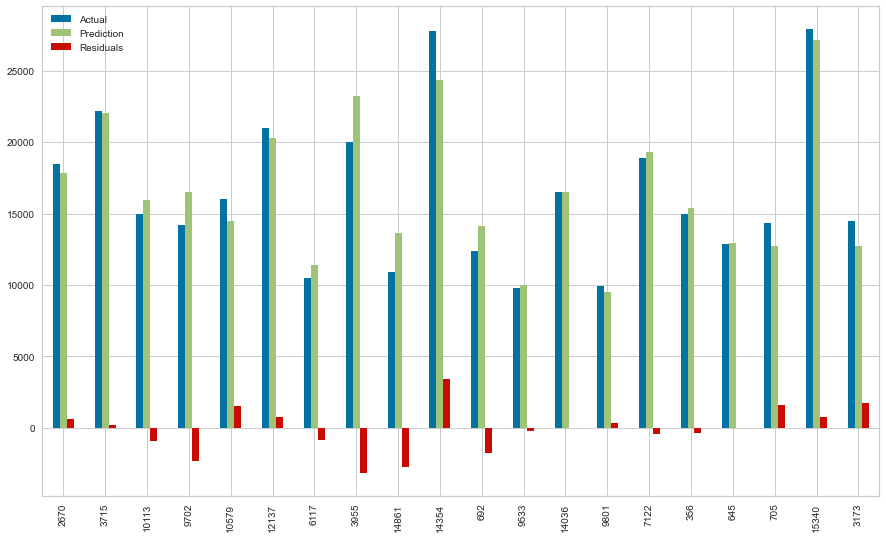

In [67]:
compare.head(20).plot(kind="bar", figsize=(15,9))          # yukardaki compare df i görselleştirildi
plt.show();

In [68]:
pd.DataFrame(lm2.coef_, index = X.columns, columns = ["Coef"]).sort_values("Coef")

#lm2 de yani 35475 den düşük price lar için, değişkenlerin katsayılarını bir dataframe olarak elde ettik

,Coef
make_model_Renault Duster,-10082.949634
make_model_Renault Clio,-5552.266114
make_model_Opel Corsa,-5421.946365
make_model_Opel Astra,-3493.186147
Drive_chain_rear,-3168.458113
Type_Employee's car,-1958.503037
Type_Used,-1848.657257
Gearing_Type_Manual,-1585.586003
Drive_chain_front,-1522.460679
age,-1493.027320


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

MinMax scaler değerleri kullandık.MinMax Scaling, verinin 0 ile 1 arasında değerler aldığı bir durumdur. Burada dağılım, verinin dağılımı ile benzerdir. Burada ‘outlier’ denilen dışta kalan verilere karşı hassasiyet durumu vardır, bu yüzden bu değerlerin fazla olduğu bir durumda iyi bir performans gösteremeyebilir. MinMax Scaler ile hangi değer aralığına çekileceğini biz kendimiz belirleyebiliyoruz.

MinMaxScaler, [0, 1] aralığındaki veya veri kümesinde negatif değerler varsa [-1, 1] aralığındaki tüm veri özelliklerini ölçekler. Bu ölçekleme, [0, 0.005] dar aralığındaki tüm satır içi değerleri sıkıştırır.

StandardScaler, ampirik ortalama ve standart sapmayı hesaplarken aykırı değerlerin etkisinden dolayı, aykırı değerlerin varlığında dengeli özellik ölçeklerini garanti etmez. Bu, özellik değerleri aralığında daralmaya yol açar. z score olarak gelir sonuçlar

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

## Ridge

## Random state=42

Çok değişkenli regresyon verilerini analiz etmede kullanılır. Amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır. Over-fittinge karşı dirençlidir. Çok boyutluluğa çözüm sunar. Tüm değişkenler ile model kurar, ilgisiz değişkenleri çıkarmaz sadece katsayılarını sıfıra yaklaştırır. Modeli kurarken alpha (ceza) için iyi bir değer bulmak gerekir.

Ridge ile default değerlerleri kullanarak score lara bakıyoruz. lasso ve elastic modelde de bu sıralamayı kullanacağız. açıklamalar için bu kısma bakılabilir.

In [85]:
from sklearn.linear_model import Ridge, RidgeCV

In [86]:
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [87]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)    

,train,test
R2,0.899,0.902
mae,1416.825,1408.610
mse,3810868.810,3706809.471
rmse,1952.145,1925.308


GridSearch ile best parametreleri bulacağımız için ridge ile CV yapmadan devam ediyoruz.

## Finding best alpha for Ridge

best alpha değerini GridSearch ile buluyoruz. hyperparametreleri bulmak için GridSearch kullanıyoruz. kendi içinde CV yapar.

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [90]:
ridge_model = Ridge(random_state = 42)

param_grid = {"alpha" : alpha_space}

ridge_grid_model = GridSearchCV( estimator = ridge_model,
                               param_grid = param_grid,
                               scoring = "neg_root_mean_squared_error",
                               cv = 10,
                               n_jobs = -1 )   # n_jobs = -1 ile tüm işlemciler bu işleme yönlendirilir

In [91]:
ridge_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [94]:
ridge_grid_model.best_params_           # best alpha değerimiz 1.02

{'alpha': 1.02}

In [95]:
pd.DataFrame(ridge_grid_model.cv_results_)  # burada her alpha değeri için 10 cv yapılıyor ve score ları karşılaştırılarak 
                                            # en iyi score un alındığı alpha değeri bulunuyor. 
                                          # her satırda 10 cv sonucu score ve ortalamaları ile en iyi sonuç verme sıralaması var

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.182372,0.023432,0.004884,0.007048,0.01,{'alpha': 0.01},-1867.443956,-2109.429237,-2074.127647,-1945.737346,-1981.038932,-1902.889561,-1937.285532,-2101.563866,-1977.993633,-1917.003104,-1981.451281,81.213117,3
1,0.195337,0.016467,0.000801,0.000980,1.02,{'alpha': 1.02},-1865.583266,-2108.119366,-2073.372149,-1943.260946,-1984.114901,-1907.709924,-1935.271891,-2096.835105,-1975.921528,-1916.299000,-1980.648808,80.335517,1
2,0.192302,0.022783,0.000400,0.000800,2.03,{'alpha': 2.03},-1864.850270,-2108.578888,-2073.833587,-1942.127204,-1986.407389,-1912.513385,-1934.829541,-2094.150839,-1975.066783,-1916.738946,-1980.909683,79.821918,2
3,0.184178,0.014290,0.001863,0.004675,3.04,{'alpha': 3.04},-1864.787040,-2109.517189,-2074.851323,-1941.776137,-1988.266004,-1916.796131,-1935.241424,-2092.624801,-1974.843195,-1917.615018,-1981.631826,79.466438,4
4,0.184369,0.017681,0.000200,0.000601,4.05,{'alpha': 4.05},-1865.161342,-2110.712362,-2076.181360,-1941.941842,-1989.869129,-1920.636709,-1936.164514,-2091.822802,-1975.040006,-1918.736188,-1982.626625,79.201685,5
5,0.183793,0.010078,0.001763,0.004660,5.06,{'alpha': 5.06},-1865.839734,-2112.072472,-2077.703900,-1942.473866,-1991.313202,-1924.134356,-1937.415715,-2091.506329,-1975.543523,-1920.017777,-1983.802087,78.993150,6
6,0.188398,0.014848,0.004928,0.005850,6.07,{'alpha': 6.07},-1866.738898,-2113.547057,-2079.352637,-1943.278064,-1992.656710,-1927.367437,-1938.888622,-2091.532868,-1976.282499,-1921.413550,-1985.105834,78.821280,7
7,0.182741,0.012367,0.002352,0.004489,7.08,{'alpha': 7.08},-1867.803418,-2115.104608,-2081.087716,-1944.291178,-1993.937192,-1930.393853,-1940.517029,-2091.811539,-1977.208213,-1922.894813,-1986.504956,78.674371,8
8,0.184624,0.016012,0.000801,0.001078,8.09,{'alpha': 8.09},-1868.994572,-2116.723853,-2082.883580,-1945.468394,-1995.179459,-1933.255994,-1942.257381,-2092.281312,-1978.285322,-1924.442093,-1987.977196,78.545121,9
9,0.187554,0.017118,0.002083,0.004626,9.1,{'alpha': 9.1},-1870.284231,-2118.389624,-2084.722942,-1946.776667,-1996.400160,-1935.985104,-1944.079693,-2092.899439,-1979.487080,-1926.041287,-1989.506623,78.428820,10


In [96]:
ridge_grid_model.best_index_       # en iyi alpha sonucunu aldığımız index i verir. yukardaki df te 1 index e bak

1

In [97]:
ridge_grid_model.best_score_        # en iyi alpha sonucunu aldığımız score

-1980.648807726422

In [98]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)    

,train,test
R2,0.899,0.902
mae,1416.830,1408.614
mse,3810922.919,3706831.736
rmse,1952.159,1925.313


In [99]:
y_pred = ridge_grid_model.predict(X_test_scaled)

rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [100]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

# best alpha değeri ile ridge model fit ettik ve katsayılarını görüyoruz. ridge de fetaure azaltılmaz etkisi azaltılır katsayıları küçültülerek

,Coef
km,-10471.173964
make_model_Renault Duster,-8930.503717
make_model_Renault Clio,-5524.449774
make_model_Opel Corsa,-5427.542876
age,-4515.432207
make_model_Opel Astra,-3460.991594
Displacement_cc,-2430.195451
Drive_chain_rear,-2021.501595
Type_Employee's car,-1943.223627
Type_Used,-1840.693888


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [101]:
from sklearn.linear_model import Lasso, LassoCV

In [102]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [103]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.902
mae,1418.176,1409.356
mse,3823073.499,3712910.129
rmse,1955.268,1926.891


## Finding best alpha for Lasso

In [104]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [105]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [106]:
pd.DataFrame(lasso_grid_model.cv_results_)  # burada her alpha değeri için 10 cv yapılıyor ve score ları karşılaştırılarak 
                                            # en iyi score un alındığı alpha değeri bulunuyor. 
                                          # her satırda 10 cv sonucu score ve ortalamaları ile en iyi sonuç verme sıralaması var

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.812174,0.054689,0.002595,0.004969,0.01,{'alpha': 0.01},-1867.352765,-2109.249333,-2074.047156,-1945.533198,-1981.109654,-1902.829251,-1937.215599,-2101.304160,-1977.926350,-1916.731947,-1981.329941,81.190416,3
1,0.470382,0.057945,0.000199,0.000598,1.02,{'alpha': 1.02},-1863.165491,-2101.056795,-2074.039220,-1934.383764,-1987.298629,-1913.294854,-1932.612552,-2074.878574,-1977.688946,-1915.995797,-1977.441462,76.821901,1
2,0.430748,0.038103,0.002462,0.004526,2.03,{'alpha': 2.03},-1864.859110,-2103.352941,-2078.061619,-1938.211875,-1986.185243,-1919.752574,-1935.021910,-2068.219002,-1981.678458,-1916.588183,-1979.193092,75.714395,2
3,0.387877,0.080859,0.003535,0.004510,3.04,{'alpha': 3.04},-1870.483420,-2109.168335,-2085.148159,-1944.833569,-1988.969190,-1927.543386,-1941.346118,-2066.931741,-1988.904875,-1920.638308,-1984.396710,75.009561,4
4,0.322862,0.044461,0.002103,0.001710,4.05,{'alpha': 4.05},-1875.860926,-2116.412861,-2091.135194,-1952.251964,-1992.320287,-1936.347557,-1948.407823,-2070.109847,-1995.095930,-1925.374958,-1990.331735,74.762230,5
5,0.327578,0.026001,0.003303,0.001737,5.06,{'alpha': 5.06},-1881.268178,-2124.258019,-2097.495270,-1959.637876,-1995.444560,-1941.650948,-1955.625761,-2074.159080,-2000.707407,-1931.719285,-1996.196638,74.889143,6
6,0.378205,0.066167,0.001375,0.001807,6.07,{'alpha': 6.07},-1886.801818,-2131.716258,-2103.799998,-1964.059350,-1998.676389,-1946.671623,-1960.661076,-2076.588044,-2006.875853,-1938.238390,-2001.408880,75.053343,7
7,0.379486,0.070467,0.002663,0.003968,7.08,{'alpha': 7.08},-1892.561966,-2138.931568,-2110.348063,-1968.611046,-2002.380708,-1951.871351,-1965.742453,-2079.470749,-2012.936669,-1944.741565,-2006.759614,75.221018,8
8,0.354336,0.080182,0.003302,0.002723,8.09,{'alpha': 8.09},-1899.503185,-2146.763692,-2117.415637,-1974.046827,-2006.721738,-1957.444227,-1971.222365,-2083.085771,-2019.180117,-1951.919311,-2012.730287,75.329802,9
9,0.321070,0.061455,0.004000,0.004099,9.1,{'alpha': 9.1},-1906.956658,-2155.034977,-2124.483714,-1979.834038,-2011.149020,-1963.533840,-1976.608098,-2086.861730,-2025.827632,-1959.209604,-2018.949931,75.420100,10


In [107]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [108]:
lasso_grid_model.best__

1

In [109]:
lasso_grid_model.best_score_

-1977.4414621032367

In [110]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.902
mae,1418.222,1409.451
mse,3823490.646,3713438.152
rmse,1955.375,1927.028


In [111]:
y_pred = lasso_grid_model.predict(X_test_scaled)

lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [112]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10465.960593
make_model_Renault Duster,-7759.433114
make_model_Renault Clio,-5475.621837
make_model_Opel Corsa,-5426.977859
age,-4523.329466
make_model_Opel Astra,-3453.133446
Displacement_cc,-2050.570227
Type_Employee's car,-1851.251399
Type_Used,-1764.185793
Gearing_Type_Manual,-1620.027652


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

In [113]:
from sklearn.linear_model import ElasticNet

In [114]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [115]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.597,0.607
mae,3086.211,3046.938
mse,15278167.149,14823783.474
rmse,3908.730,3850.167


## Finding best alpha and l1_ratio for ElasticNet

### random state = 42

In [116]:
elastic_model = ElasticNet(random_state=42)

param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],       # l1_ratio parametreside dahil olduğu için işlem çok uzun sürmesin
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}         # diye alpha ya daha önceki best parametre ve farklı değerler verdik
                                                            # l1_ratio 0.5ten büyük se lasso gibi davranır
elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [117]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [118]:
pd.DataFrame(elastic_grid_model.cv_results_)  # burada her alpha ve l1_ratio değeri için 10 cv yapılıyor ve score ları karşılaştırılarak 
                                            # en iyi score un alındığı alpha ve l1_ratio değeri bulunuyor. 
                                          # her satırda 10 cv sonucu score ve ortalamaları ile en iyi sonuç verme sıralaması var

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.212992,0.015517,0.004256,0.003080,1.02,0.5,"{'alpha': 1.02, 'l1_ratio': 0.5}",-3747.576324,-4028.974169,-3951.765550,-3976.606073,-3967.446345,-3970.114945,-3875.510299,-3943.317763,-4037.269625,-3818.634221,-3931.721531,87.038813,29
1,0.236519,0.015732,0.002527,0.001660,1.02,0.7,"{'alpha': 1.02, 'l1_ratio': 0.7}",-3329.381105,-3617.410531,-3550.687448,-3564.642001,-3560.180667,-3544.501008,-3468.464831,-3520.877701,-3617.975231,-3412.341833,-3518.646236,86.487879,25
2,0.327357,0.015446,0.003894,0.003165,1.02,0.9,"{'alpha': 1.02, 'l1_ratio': 0.9}",-2632.720625,-2923.055163,-2885.626271,-2847.043156,-2847.697787,-2804.790417,-2781.379234,-2821.533149,-2897.399495,-2735.095971,-2817.634127,81.466488,17
3,0.424261,0.016647,0.001951,0.002008,1.02,0.95,"{'alpha': 1.02, 'l1_ratio': 0.95}",-2346.496091,-2629.395713,-2603.117865,-2527.252501,-2528.618739,-2482.277740,-2485.480631,-2536.523112,-2576.696098,-2445.430530,-2516.128902,77.858370,13
4,0.505114,0.016358,0.002510,0.001818,1.02,0.99,"{'alpha': 1.02, 'l1_ratio': 0.99}",-2009.418495,-2270.696194,-2244.886101,-2114.910769,-2129.192918,-2094.239955,-2109.841113,-2206.135133,-2152.321613,-2080.681105,-2141.232340,75.440801,9
5,0.508958,0.018140,0.002261,0.001759,1.02,1,"{'alpha': 1.02, 'l1_ratio': 1}",-1863.165491,-2101.056795,-2074.039220,-1934.383764,-1987.298629,-1913.294854,-1932.612552,-2074.878574,-1977.688946,-1915.995797,-1977.441462,76.821901,1
6,0.172780,0.012389,0.002253,0.001604,2,0.5,"{'alpha': 2, 'l1_ratio': 0.5}",-4326.582995,-4601.106827,-4516.911249,-4539.544451,-4522.444023,-4548.088992,-4437.632037,-4529.330125,-4613.547026,-4390.332663,-4502.552039,86.352087,35
7,0.190383,0.012454,0.003373,0.002264,2,0.7,"{'alpha': 2, 'l1_ratio': 0.7}",-3890.169670,-4169.231331,-4089.823689,-4115.658233,-4104.686503,-4113.403872,-4014.094973,-4087.556567,-4179.418560,-3958.050713,-4072.209411,86.971467,32
8,0.262475,0.013107,0.002925,0.001739,2,0.9,"{'alpha': 2, 'l1_ratio': 0.9}",-3026.399629,-3317.349723,-3262.221784,-3259.314423,-3257.460400,-3228.736144,-3172.161828,-3215.724649,-3309.981086,-3118.986342,-3216.833601,85.013434,21
9,0.309214,0.009728,0.002611,0.001992,2,0.95,"{'alpha': 2, 'l1_ratio': 0.95}",-2627.266628,-2917.034152,-2879.651042,-2840.057156,-2840.656721,-2797.729849,-2775.329788,-2815.384890,-2890.922868,-2728.755990,-2811.278908,81.275243,16


In [119]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [120]:
elastic_grid_model.best_index_

5

In [121]:
elastic_grid_model.best_score_

-1977.4414621032367

In [122]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.902
mae,1418.222,1409.451
mse,3823490.646,3713438.152
rmse,1955.375,1927.028


In [124]:
y_pred = elastic_grid_model.predict(X_test_scaled)
                                    
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [127]:
elastic = ElasticNet(alpha=1.02, l1_ratio = 1, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(elastic.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10465.960593
make_model_Renault Duster,-7759.433114
make_model_Renault Clio,-5475.621837
make_model_Opel Corsa,-5426.977859
age,-4523.329466
make_model_Opel Astra,-3453.133446
Displacement_cc,-2050.570227
Type_Employee's car,-1851.251399
Type_Used,-1764.185793
Gearing_Type_Manual,-1620.027652


## Feature Importance

Az sayıda features ile en iyi tahmini yapmak istiyoruz. doğru karar verebilmek için feature importance yapıyoruz. lasso da feature azaltma olduğu için lasso kullanılır. ridge kullanılmaz

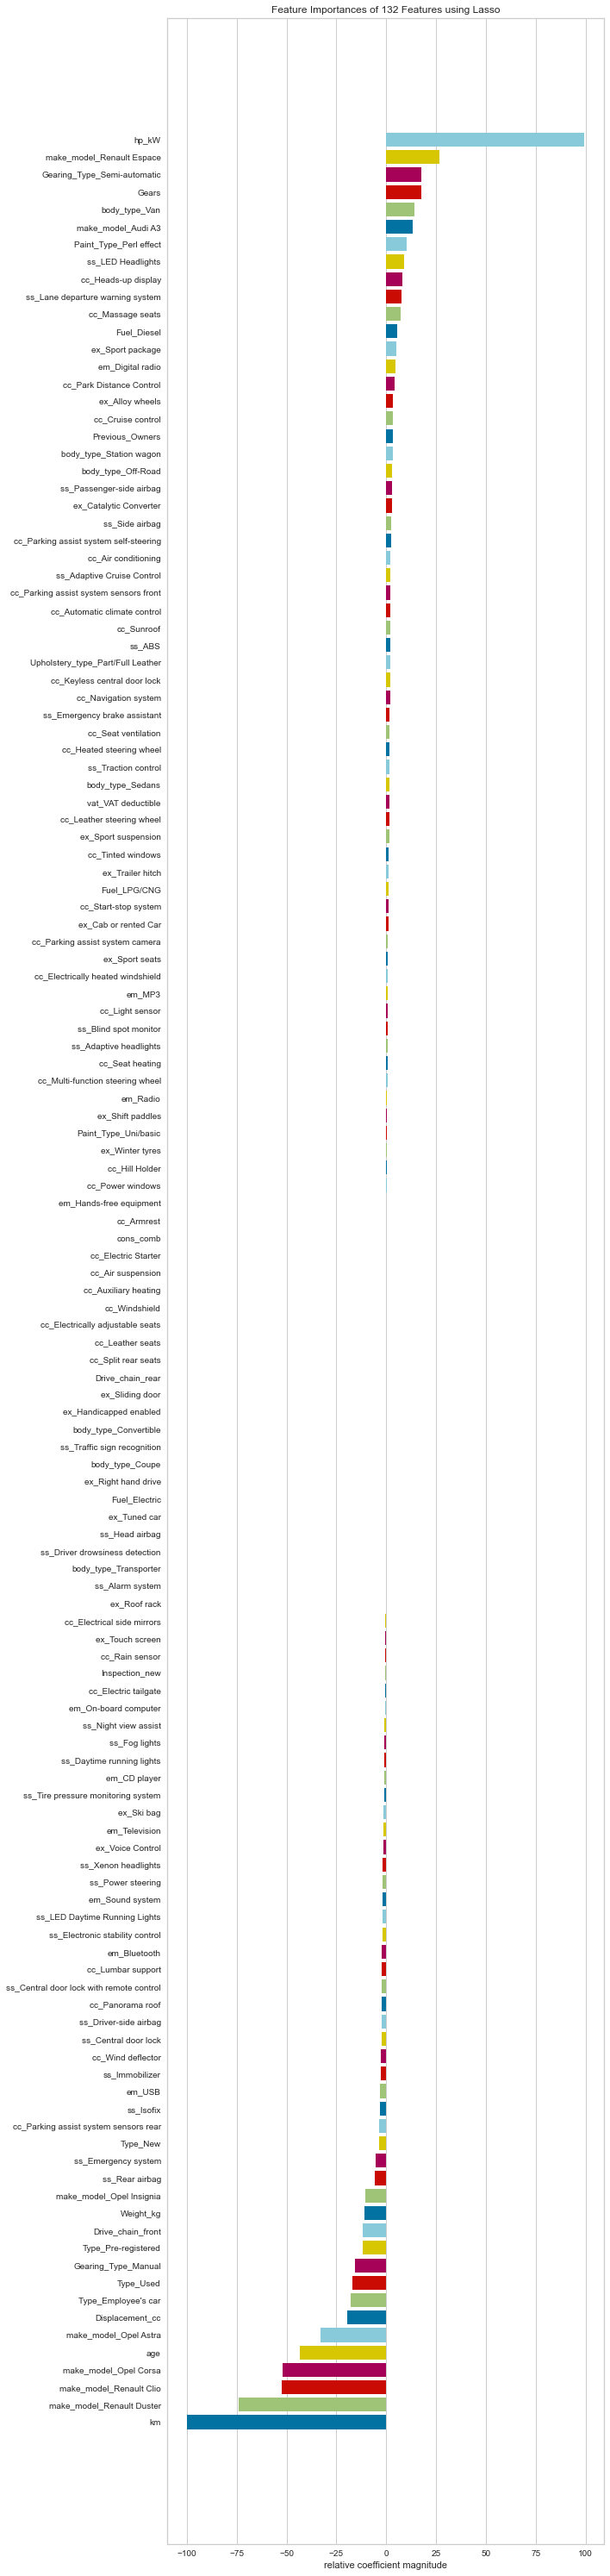

In [129]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz


viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)  # lasso ve best alpha değeri veriyoruz
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# fetauresların önem derecesini görüyoruz. yukardan aşağıya pozitif etkiden negatif etkiye doğru sıralanıyorlar

modelim için önemli olduğuna karar verdiğim 4 features ile target variable ı alarak yeni bir df oluşturuyoruz. burada dikkat edilmesi gereken df2 olarak kopyaladığımız ilk verilerden oluşturuyoruz yeni df i

In [160]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "price"]]

In [161]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.0,56013.000000,3.0,Automatic,15770
1,Audi A1,141.0,80000.000000,2.0,Automatic,14500
2,Audi A1,85.0,83450.000000,3.0,Automatic,14640
3,Audi A1,66.0,73000.000000,3.0,Automatic,14500
4,Audi A1,66.0,16200.000000,3.0,Automatic,16790
...,...,...,...,...,...,...
15910,Renault Espace,147.0,1647.362609,0.0,Automatic,39950
15911,Renault Espace,165.0,9900.000000,0.0,Automatic,39885
15912,Renault Espace,146.0,15.000000,0.0,Automatic,39875
15913,Renault Espace,147.0,10.000000,0.0,Automatic,39700


In [162]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.0,56013.0,3.0,Automatic,15770
1,Audi A1,141.0,80000.0,2.0,Automatic,14500
2,Audi A1,85.0,83450.0,3.0,Automatic,14640
3,Audi A1,66.0,73000.0,3.0,Automatic,14500
4,Audi A1,66.0,16200.0,3.0,Automatic,16790


In [163]:
df_new[df_new["make_model"] == "Audi A2"]         # bu observation ı yine drop ediyoruz. alt kod satırında

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.0,26166.0,1.0,Manual,28200


In [164]:
df_new.drop(index=[2614], inplace =True)

In [165]:
df_new = df_new[~(df_new.price>35475)]            # outliers ları yine atıyoruz

In [166]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.0,56013.0,3.0,Automatic,15770
1,Audi A1,141.0,80000.0,2.0,Automatic,14500
2,Audi A1,85.0,83450.0,3.0,Automatic,14640
3,Audi A1,66.0,73000.0,3.0,Automatic,14500
4,Audi A1,66.0,16200.0,3.0,Automatic,16790
...,...,...,...,...,...,...
15787,Renault Espace,118.0,10803.0,1.0,Automatic,33990
15788,Renault Espace,165.0,15.0,0.0,Automatic,33975
15789,Renault Espace,118.0,1.0,1.0,Automatic,33990
15790,Renault Espace,146.0,15.0,0.0,Automatic,33975


In [167]:
df_new = pd.get_dummies(df_new)         # make_model ve Gearing_Type features ları get_dummies yaparak 15 fetures elde ediyoruz
df_new                                  # drop_first =True kullanmadım. gerçek değerleride görmek istedim

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.0,56013.0,3.0,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.0,80000.0,2.0,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.0,83450.0,3.0,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.0,73000.0,3.0,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.0,16200.0,3.0,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15787,118.0,10803.0,1.0,33990,0,0,0,0,0,0,0,1,1,0,0
15788,165.0,15.0,0.0,33975,0,0,0,0,0,0,0,1,1,0,0
15789,118.0,1.0,1.0,33990,0,0,0,0,0,0,0,1,1,0,0
15790,146.0,15.0,0.0,33975,0,0,0,0,0,0,0,1,1,0,0


In [151]:
len(df_new)

15435

### feature importance sonrası final model oluşturuyoruz

In [168]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [169]:
## test_size=0.2, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [170]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [171]:
lasso_model = Lasso(random_state=42)           #Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [172]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [173]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [174]:
lasso_final_model.best_score_

-2225.265685290311

In [175]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.870,0.868
mae,1602.417,1604.806
mse,4946880.970,4979473.428
rmse,2224.158,2231.473


In [176]:
2231/df_new.price.mean()

0.1289081100791549

In [177]:
y_pred = lasso_final_model.predict(X_test_scaled)

fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [178]:
scores = {"linear_m": {"r2_score": lm2_R2 ,            # outliers ları attıktan sonraki linear modele lm2 demiştik
 "mae": lm2_mae, 
 "rmse": lm2_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.901767,1408.869898,1925.832498
ridge_m,0.901820,1408.613594,1925.313412
lasso_m,0.901645,1409.450734,1927.028322
elastic_m,0.901645,1409.450734,1927.028322
final_m,0.868112,1604.806305,2231.473376


outliersları attıktan sonra oluşturduğumuz modellerin score larını görüyoruz. aşağıda görselleştirerek göreim.

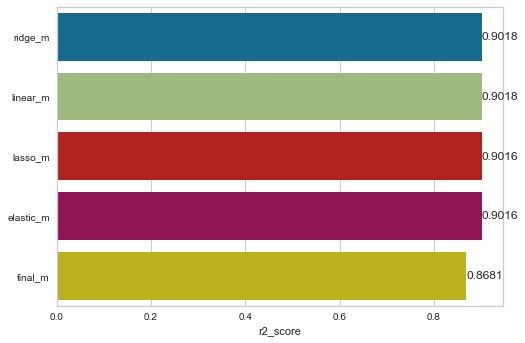

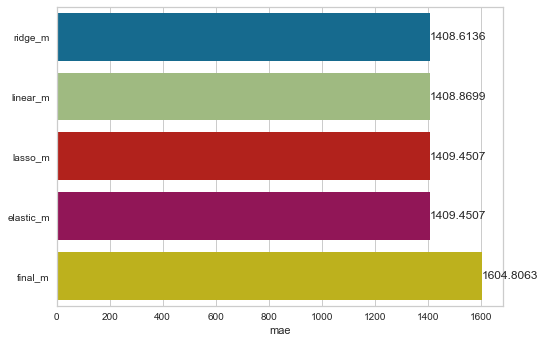

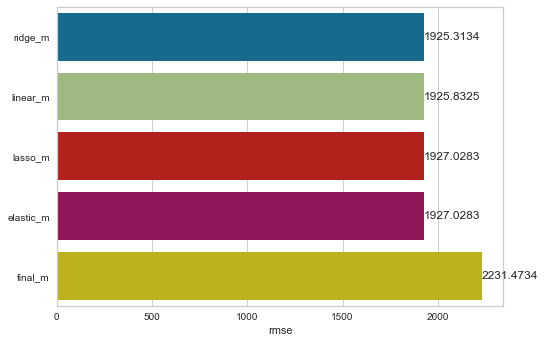

In [180]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

model score larını karşılaştırdığımızda final_modelde rmse değerimizde artış olduğunu görüyoruz. burda şunu düşünebiliriz:

133 features la 1930 rmse ile en iyi score aldığımız lasso_ model mi tercih edilmeli yoksa 15 fetaures la 2231 rmse ile final_model mi tercih edilir.

araçların satış fiyataları düşünüldüğünde rmse değerleri arasındaki 250 $ lık fark fetaures sayısının azalması, müşteriler için az features ın kullanım kolaylığı ve tercih edilebilirlik sağlayacak olması gibi nedenler göz önüne alındığında final_model tercih edilebilir. 

## Prediction new observation

## random state=42

In [ ]:
final_model e karar verdik ve bu modeli tüm data üzerinden fit ediyoruz. train test ayrımı olmuyor.

In [185]:
final_scaler = MinMaxScaler()

final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [186]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [187]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [188]:
final_model.best_estimator_

Lasso(alpha=0.01, random_state=42)

In [190]:
final_model.best_params_

{'alpha': 0.01}

### burada prediction yapıyoruz. 

In [191]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [192]:
my_dict = pd.DataFrame([my_dict])              # prediciton için gelen veri ile 4 fetaures lı bir df oluşturuyoruz
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [193]:
my_dict = pd.get_dummies(my_dict)              # get_dummies yapıyoruz
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,1,1


In [194]:
X.head(1)                                      # final_model imizi kurduğumuz X 15 fetaures lı

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.0,56013.0,3.0,1,0,0,0,0,0,0,0,1,0,0


In [195]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)  
my_dict                                   # bu kod ile 4 features lı verimizi 15 fetaures lı formata dönüştürüyoruz 

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,1,0,0,0,0,0,0,1,0,0


In [196]:
my_dict = final_scaler.transform(my_dict)          # prediction yapacağımız df scale ediyoruz
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [197]:
final_model.predict(my_dict)                       # prediction yapıyoruz.

array([19542.80213036])

___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___